# EDA and Baseline Model for Hit-Predict Project

Resume what we did in the preprocessing notebook...

## Table of Contents
1. [Setup](#setup)
    - [Importing Libraries](#lib)
    - [Loading Data](#data)
2. [Exploratory Data Analysis and Visualizations](#eda)
    - [Exploration of Variables](#sub1)
    - [Distribution of Target Variable - Popularity](#sub2)
    - [Dealing with the 0 values in the target variable & saving new datasets](#sub3) 
        - [Replacing them with artist popularity](#subsub1)
        - [Removing them](#subsub2)
        - [Not doing anything](#subsub3)
    - [Sub bullet points](#sub4)
    - [Sub bullet points](#sub5)
    - [Sub bullet points](#sub6)
3. [Baseline Model](#baseline)
    - [Sub bullet points](#sub7)
    - [Sub bullet points](#sub8)
    - [Sub bullet points](#sub9)

## 1. Setup
<a id="setup"></a>

### Importing Libraries
<a id="lib"></a>

In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.stats import zscore

### Loading Data
<a id="data"></a>

In [46]:
DATA_PATH = "../data/processed_spotify_songs.csv"
df = pd.read_csv(DATA_PATH)

In [47]:
df.describe()

track_popularity  danceability        energy           key  \
count      28352.000000  28352.000000  28352.000000  28352.000000   
mean          39.335320      0.463788      0.521398      5.367417   
std           23.699443      0.188308      0.238359      3.613743   
min            0.000000      0.000000      0.000000      0.000000   
25%           21.000000      0.325701      0.335241      2.000000   
50%           42.000000      0.464561      0.521284      6.000000   
75%           58.000000      0.597751      0.710649      9.000000   
max          100.000000      1.000000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  28352.000000  28352.000000  28352.000000  28352.000000   
mean       0.699150      0.565533      0.453648      0.449806   
std        0.099062      0.495696      0.127350      0.248615   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.645094      0.000000      0.354797      0.243211   
50%        0.714462      1.000000      0.408549      0.431212   
75%        0.769362      1.000000      0.525214      0.639532   
max        1.000000      1.000000      1.000000      1.000000   

       instrumentalness      liveness  ...           edm           r&b  \
count      28352.000000  28352.000000  ...  28352.000000  28352.000000   
mean           0.175032      0.544491  ...      0.195295      0.181222   
std            0.289067      0.131413  ...      0.396435      0.385209   
min            0.000000      0.000000  ...      0.000000      0.000000   
25%            0.000000      0.453020  ...      0.000000      0.000000   
50%            0.027490      0.503325  ...      0.000000      0.000000   
75%            0.187693      0.629961  ...      0.000000      0.000000   
max            1.000000      1.000000  ...      1.000000      1.000000   

                pop         latin  artist_track_encoded  playlist_id_encoded  \
count  28352.000000  28352.000000          28352.000000         28352.000000   
mean       0.181010      0.163622             39.335320            39.335320   
std        0.385033      0.369938             17.499857            14.908984   
min        0.000000      0.000000              0.000000             3.548387   
25%        0.000000      0.000000             28.000000            28.983051   
50%        0.000000      0.000000             40.666667            38.696970   
75%        0.000000      0.000000             52.000000            50.740260   
max        1.000000      1.000000             97.000000            79.195652   

       track_album_id_encoded  release_year  release_month   release_day  
count            28352.000000  26671.000000   26671.000000  26671.000000  
mean                39.335320   2012.103146       6.418057     14.198268  
std                 23.415735     10.246982       3.735432      9.434473  
min                  0.000000   1957.000000       1.000000      1.000000  
25%                 21.888889   2010.000000       3.000000      6.000000  
50%                 43.000000   2016.000000       7.000000     14.000000  
75%                 58.000000   2019.000000      10.000000     22.000000  
max                100.000000   2020.000000      12.000000     31.000000  

[8 rows x 25 columns]

In [48]:
df.head()

track_artist  track_popularity          track_album_id  \
0     Barbie's Cradle              41.0  1srJQ0njEQgd8w4XSqI4JQ   
1                RIKA              15.0  1ficfUnZMaY1QkNp15Slzm   
2       Steady Rollin              28.0  3z04Lb9Dsilqw68SHt6jLB   
3  The.madpix.project              24.0  1Z4ANBVuhTlS6DprlP0m1q   
4         YOSA & TAAR              38.0  2BuYm9UcKvI0ydXs5JKwt0   

  track_album_release_date             playlist_id playlist_subgenre  \
0               2001-01-01  37i9dQZF1DWYDQ8wBxd7xt      classic rock   
1               2018-01-26  0JmBB9HfrzDiZoPVRdv8ns          neo soul   
2               2017-11-21  3YouF0u7waJnolytf9JCXf         hard rock   
3               2015-08-07  5TiiHps0hNCyQ6ijVkNZQs        electropop   
4               2018-11-16  37i9dQZF1DXdOtZGKonFlM         dance pop   

   danceability    energy   key  loudness  ...  edm  r&b  pop  latin  \
0      0.481351  0.160801   2.0  0.588413  ...    0    0    0      0   
1      0.350541  0.495616   5.0  0.715122  ...    0    1    0      0   
2      0.095012  0.774400   9.0  0.768273  ...    0    0    0      0   
3      0.449432  0.630436  10.0  0.736041  ...    0    0    1      0   
4      0.453533  0.702244   1.0  0.713109  ...    0    0    1      0   

   artist_track_encoded  playlist_id_encoded  track_album_id_encoded  \
0                  43.5            43.100000                    41.0   
1                  15.0            26.206186                    15.0   
2                  29.5            31.697917                    28.0   
3                  12.2            39.436364                    24.0   
4                  38.0            35.673469                    38.0   

   release_year  release_month  release_day  
0        2001.0            1.0          1.0  
1        2018.0            1.0         26.0  
2        2017.0           11.0         21.0  
3        2015.0            8.0          7.0  
4        2018.0           11.0         16.0  

[5 rows x 30 columns]

## 2. Exploratory Data Analysis and Visualization
<a id="eda"></a>

### Exploration of Variables
<a id="sub1"></a>

**Categorical variables:** track_artist, track_album_id, track_album_release_date, playlist_id, playlist_subgenre, key, playlist_genre, pop, hip hop, metal, rock, edm, r&b, latin.

**Quantitative variables:** track_popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, artist_track_encoded, playlist_id_encoded, track_album_id_encoded, release_year, release_month, release_day.

### Distribution of Target Variable (Popularity)
<a id="sub2"></a>

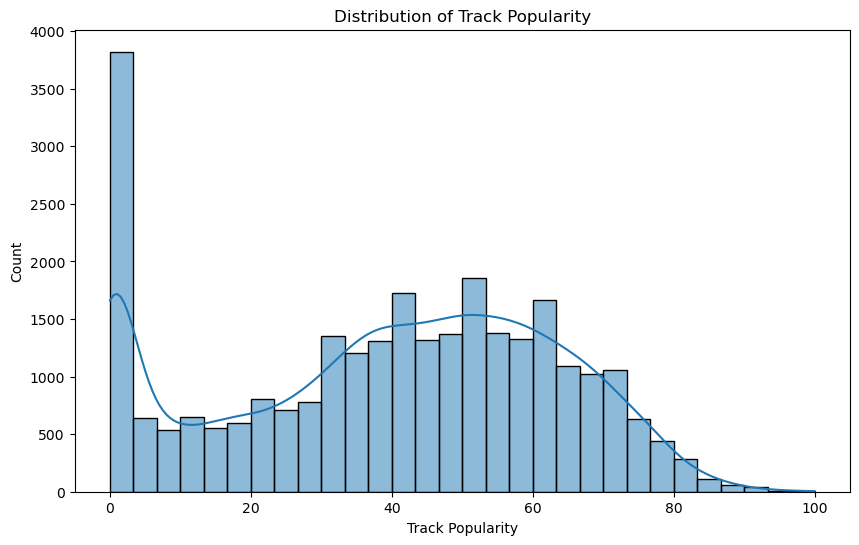

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

### Dealing with the 0 values in the target variable
<a id="sub3"></a>

#### a. Replacing 0 values with the artist popularity value (which is the mean popularity of all the songs of that artist)
<a id="subsub1"></a>

Note that obviously, if some artists only have the single songs (or multiple songs) with popularity 0, then the popularity as 0.

In [50]:
df_0mean = df.copy()
before = (df_0mean['track_popularity'] == 0).sum()
print(before)

artist_popularity = df_0mean.groupby('track_artist')['track_popularity'].transform('mean')
df_0mean['track_popularity'] = df_0mean['track_popularity'].where(df_0mean['track_popularity'] != 0, artist_popularity)

after = (df_0mean['track_popularity'] == 0).sum()
print(after)

print(f"Number of tracks with 0 popularity replaced by artist popularity: {before - after}")

2616
870
Number of tracks with 0 popularity replaced by artist popularity: 1746


We notice that some artists have a lot of songs with popularity 0! 

In [51]:
artists_with_zero_popularity_songs = df_0mean.groupby('track_artist').filter(lambda x: (x['track_popularity'] == 0).any())
artist_song_counts = artists_with_zero_popularity_songs['track_artist'].value_counts()
print(artist_song_counts)

track_artist
Ballin Entertainment    42
CASIOPEA                20
Lisa McClendon          11
T-SQUARE                 8
LemKuuja                 8
                        ..
Suicide Commando         1
Altafulla                1
Salif Keita              1
TV Rock                  1
Two Can                  1
Name: count, Length: 666, dtype: int64


Let's have a look again at the distribution of the target variable, i.e. the popularity of the tracks.

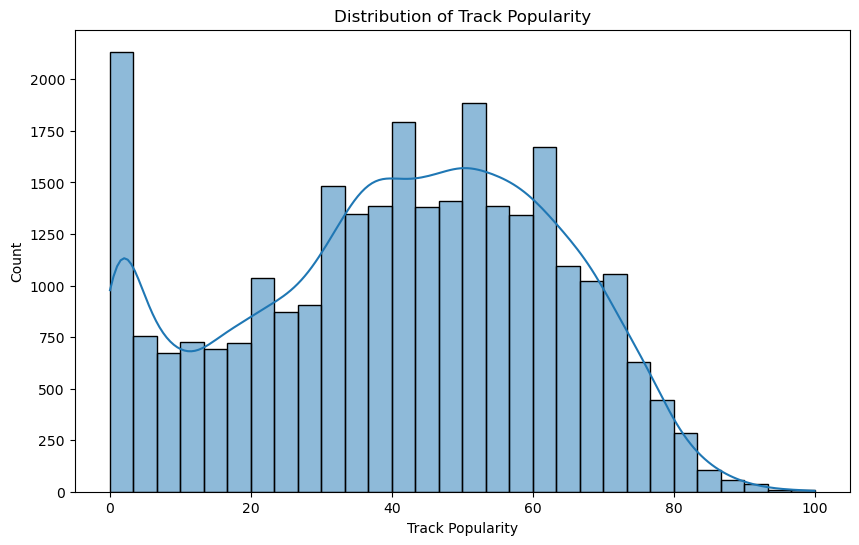

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df_0mean["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

That is already better, even though we still have a lot of 0 values, so we would need to account for that in our results' analysis.

Saving the cleaned dataset with the artist popularity values replacing the 0 values in the popularity column:

In [53]:
OUTPUT_PATH= "../data/0mean_data.csv"
df_0mean.to_csv(OUTPUT_PATH, index=False)

#### b. Removing the rows with 0 popularity
<a id="subsub2"></a>

In [54]:
df_no0 = df.copy()
print(df_no0.shape)
df_no0 = df_no0[df_no0['track_popularity'] != 0]

print(df_no0.shape)
print("Total number of songs with 0 popularity:", df.shape[0] - df_no0.shape[0])

(28352, 30)
(25736, 30)
Total number of songs with 0 popularity: 2616


Let's have a look again at the distribution of the target variable, i.e. the popularity of the tracks.

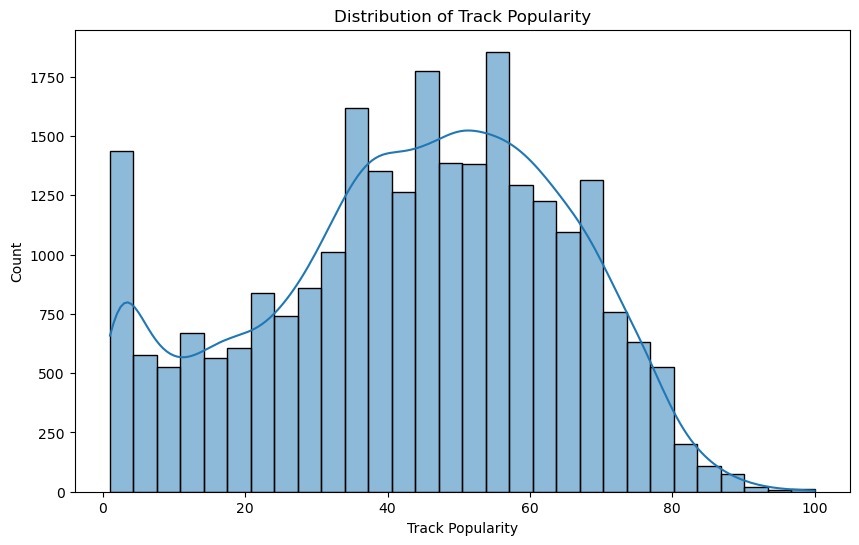

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df_no0["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

Now the next bin also has a lot of values, which again is not ideal and we might need to account for that in our results' analysis. Overall, recall that the ideal situation would be to have a normal distribution of the track popularity values.

Saving the cleaned dataset with no 0 values in the popularity column:

In [ ]:
OUTPUT_PATH= "../data/no0_data.csv"
df_no0.to_csv(OUTPUT_PATH, index=False)

#### c. Not doing anything
<a id="subsub3"></a>

The third option is the easiest, but it might not be the best option. We will explore the first two options and see which one is the best. In that case, there is no need to save the data into a new csv file as it hasn't been modified.

### Distribution of the other Variables - Eliot

Let's plot the distribution of the normalized data

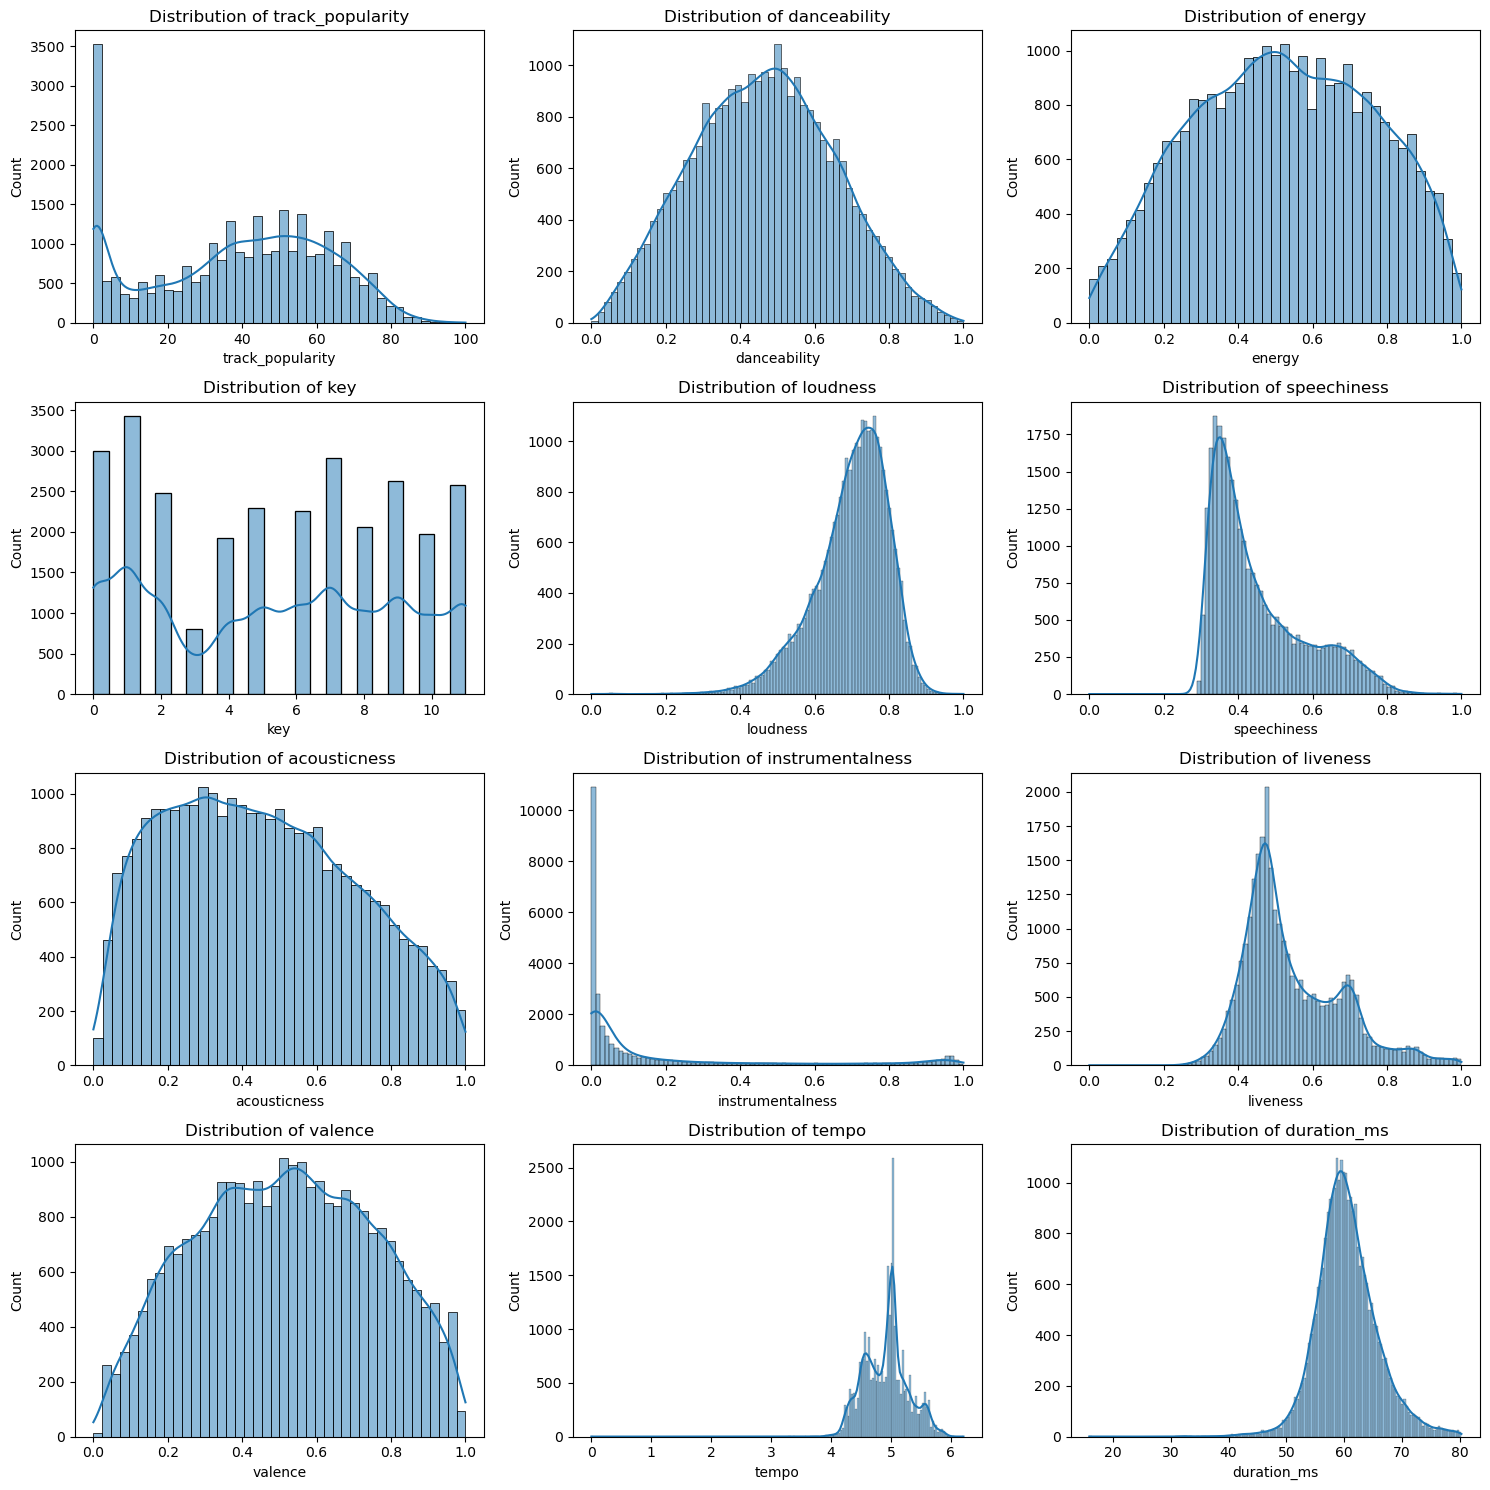

In [57]:
numeric_columns = [
    "track_popularity", "danceability", "energy", "key", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"
]

plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

#### Comment on those plot

Let's do the same thing for categorical column - track genre.

/var/folders/fk/y4nzg4p56g3_1th0bv19rx0r0000gn/T/ipykernel_82914/465088290.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, x='Genre', y='Count',palette="viridis")


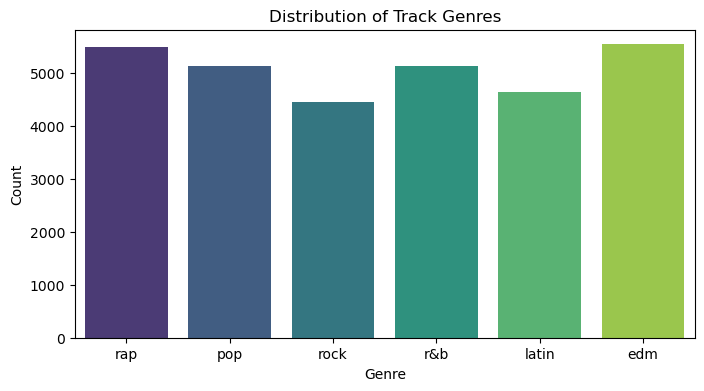

In [58]:
genre_columns = ["rap", "pop", "rock", "r&b", "latin", "edm"]
genre_data = df[genre_columns]

# Sum the occurrences of each genre
genre_counts = genre_data.sum().reset_index()
genre_counts.columns = ['Genre', 'Count']  # Renaming columns for clarity

# Plot with Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(data=genre_counts, x='Genre', y='Count',palette="viridis")
plt.title("Distribution of Track Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

There are no outliers for genre track, almost every genre is well-represented among the dataset

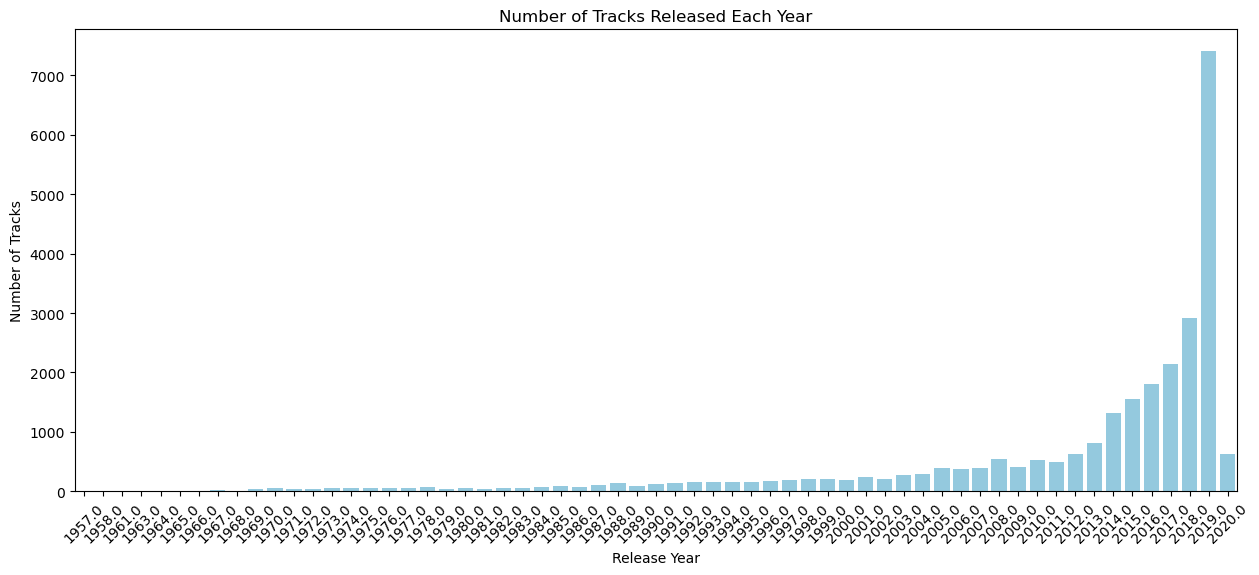

In [92]:
tracks_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
sns.barplot(x=tracks_per_year.index, y=tracks_per_year.values, color="skyblue")
plt.title("Number of Tracks Released Each Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)  # Rotate x-axis labels if there are many years
plt.show()

We can clearly see that the data is imbalanced for release year, but it's actually a good thing to have more data for recent track since they capture the current trend so that we can predict track_popularity for future hits more accurately

Lastly, let focus on the time-based distribution

### Plotting the different potential predictors against the target variable - Eliot

As before, let's start plot the different relation from the quantitative predictors with the target variable

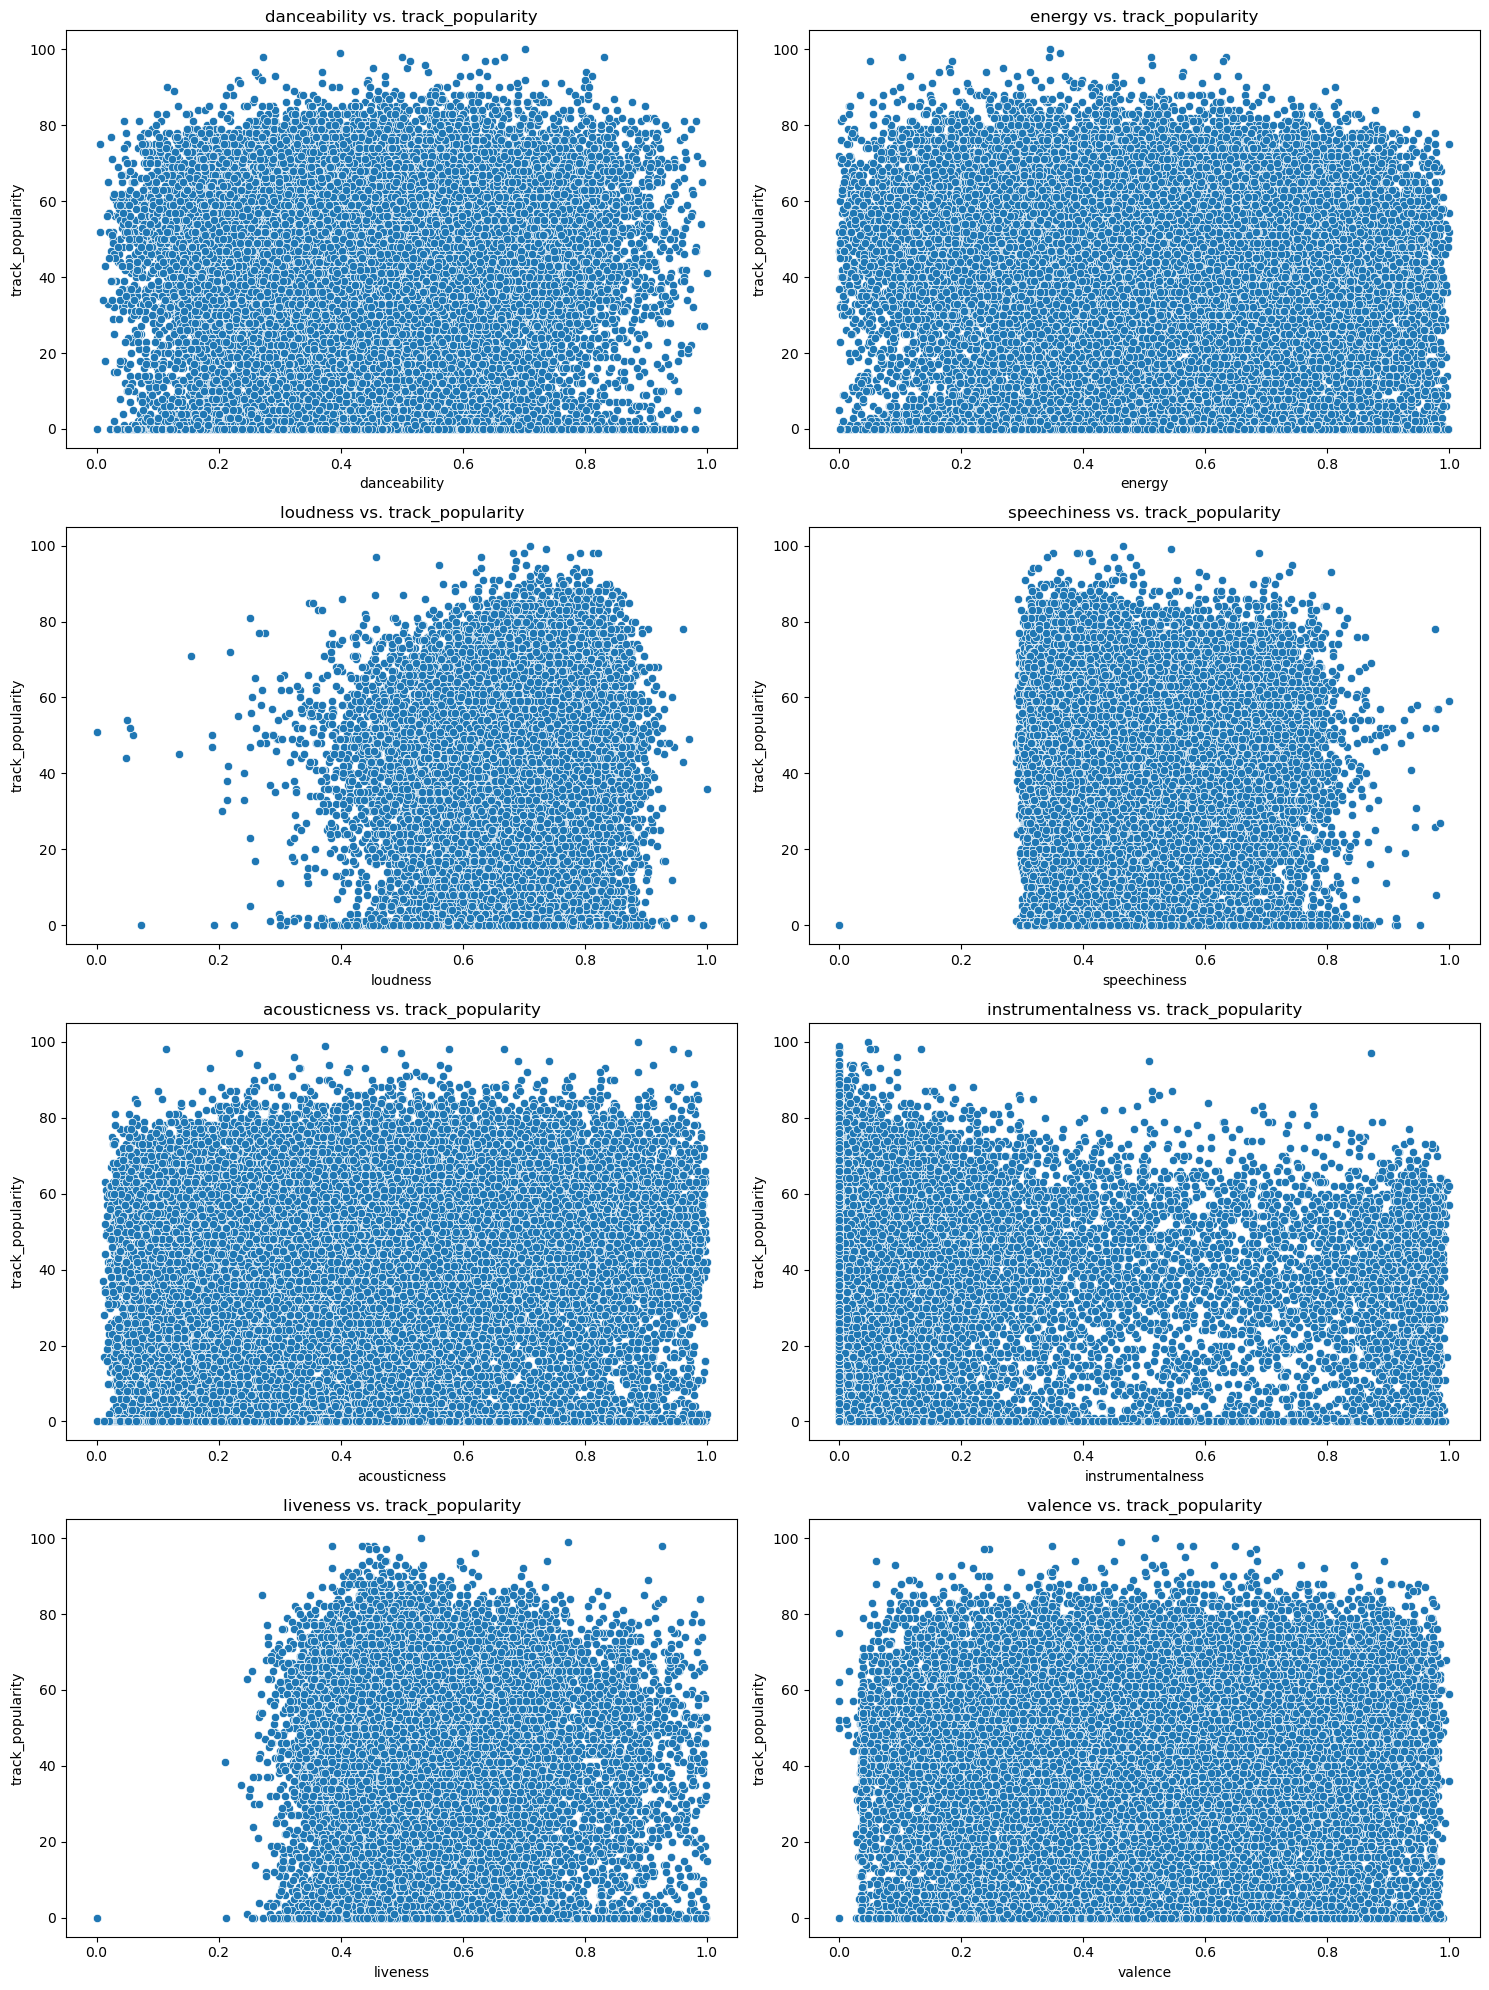

In [59]:

# Create scatter plots for each quantitative predictor vs. track_popularity
plt.figure(figsize=(15, 20))
for i, column in enumerate(column_distribution, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(data=df, x=column, y="track_popularity")
    plt.title(f"{column} vs. track_popularity")

plt.tight_layout()
plt.show()


From this plots, we can see that there are no apparent relationship from quantitative predictors with the target variable. But what about the categorical variable ?

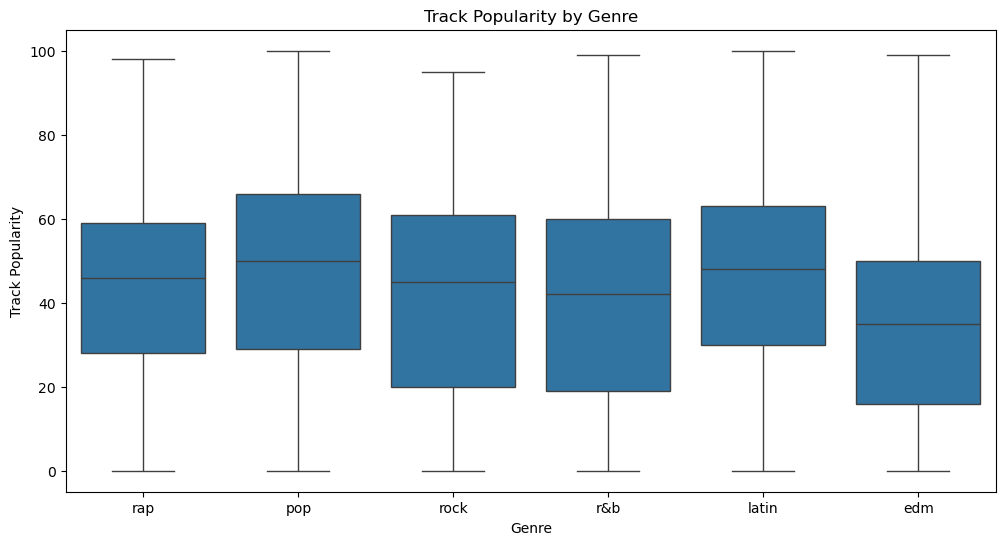

In [60]:
data_melted = df.melt(id_vars=["track_popularity"], value_vars=genre_columns, 
                        var_name="Genre", value_name="Is_Present")

# Filter to only include rows where the genre is present (Is_Present == 1)
data_genre = data_melted[data_melted["Is_Present"] == 1]

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_genre, x="Genre", y="track_popularity")
plt.title("Track Popularity by Genre")
plt.xlabel("Genre")
plt.ylabel("Track Popularity")
plt.show()

Same conclusion for the genre : there are no clear genre that is more popular than others

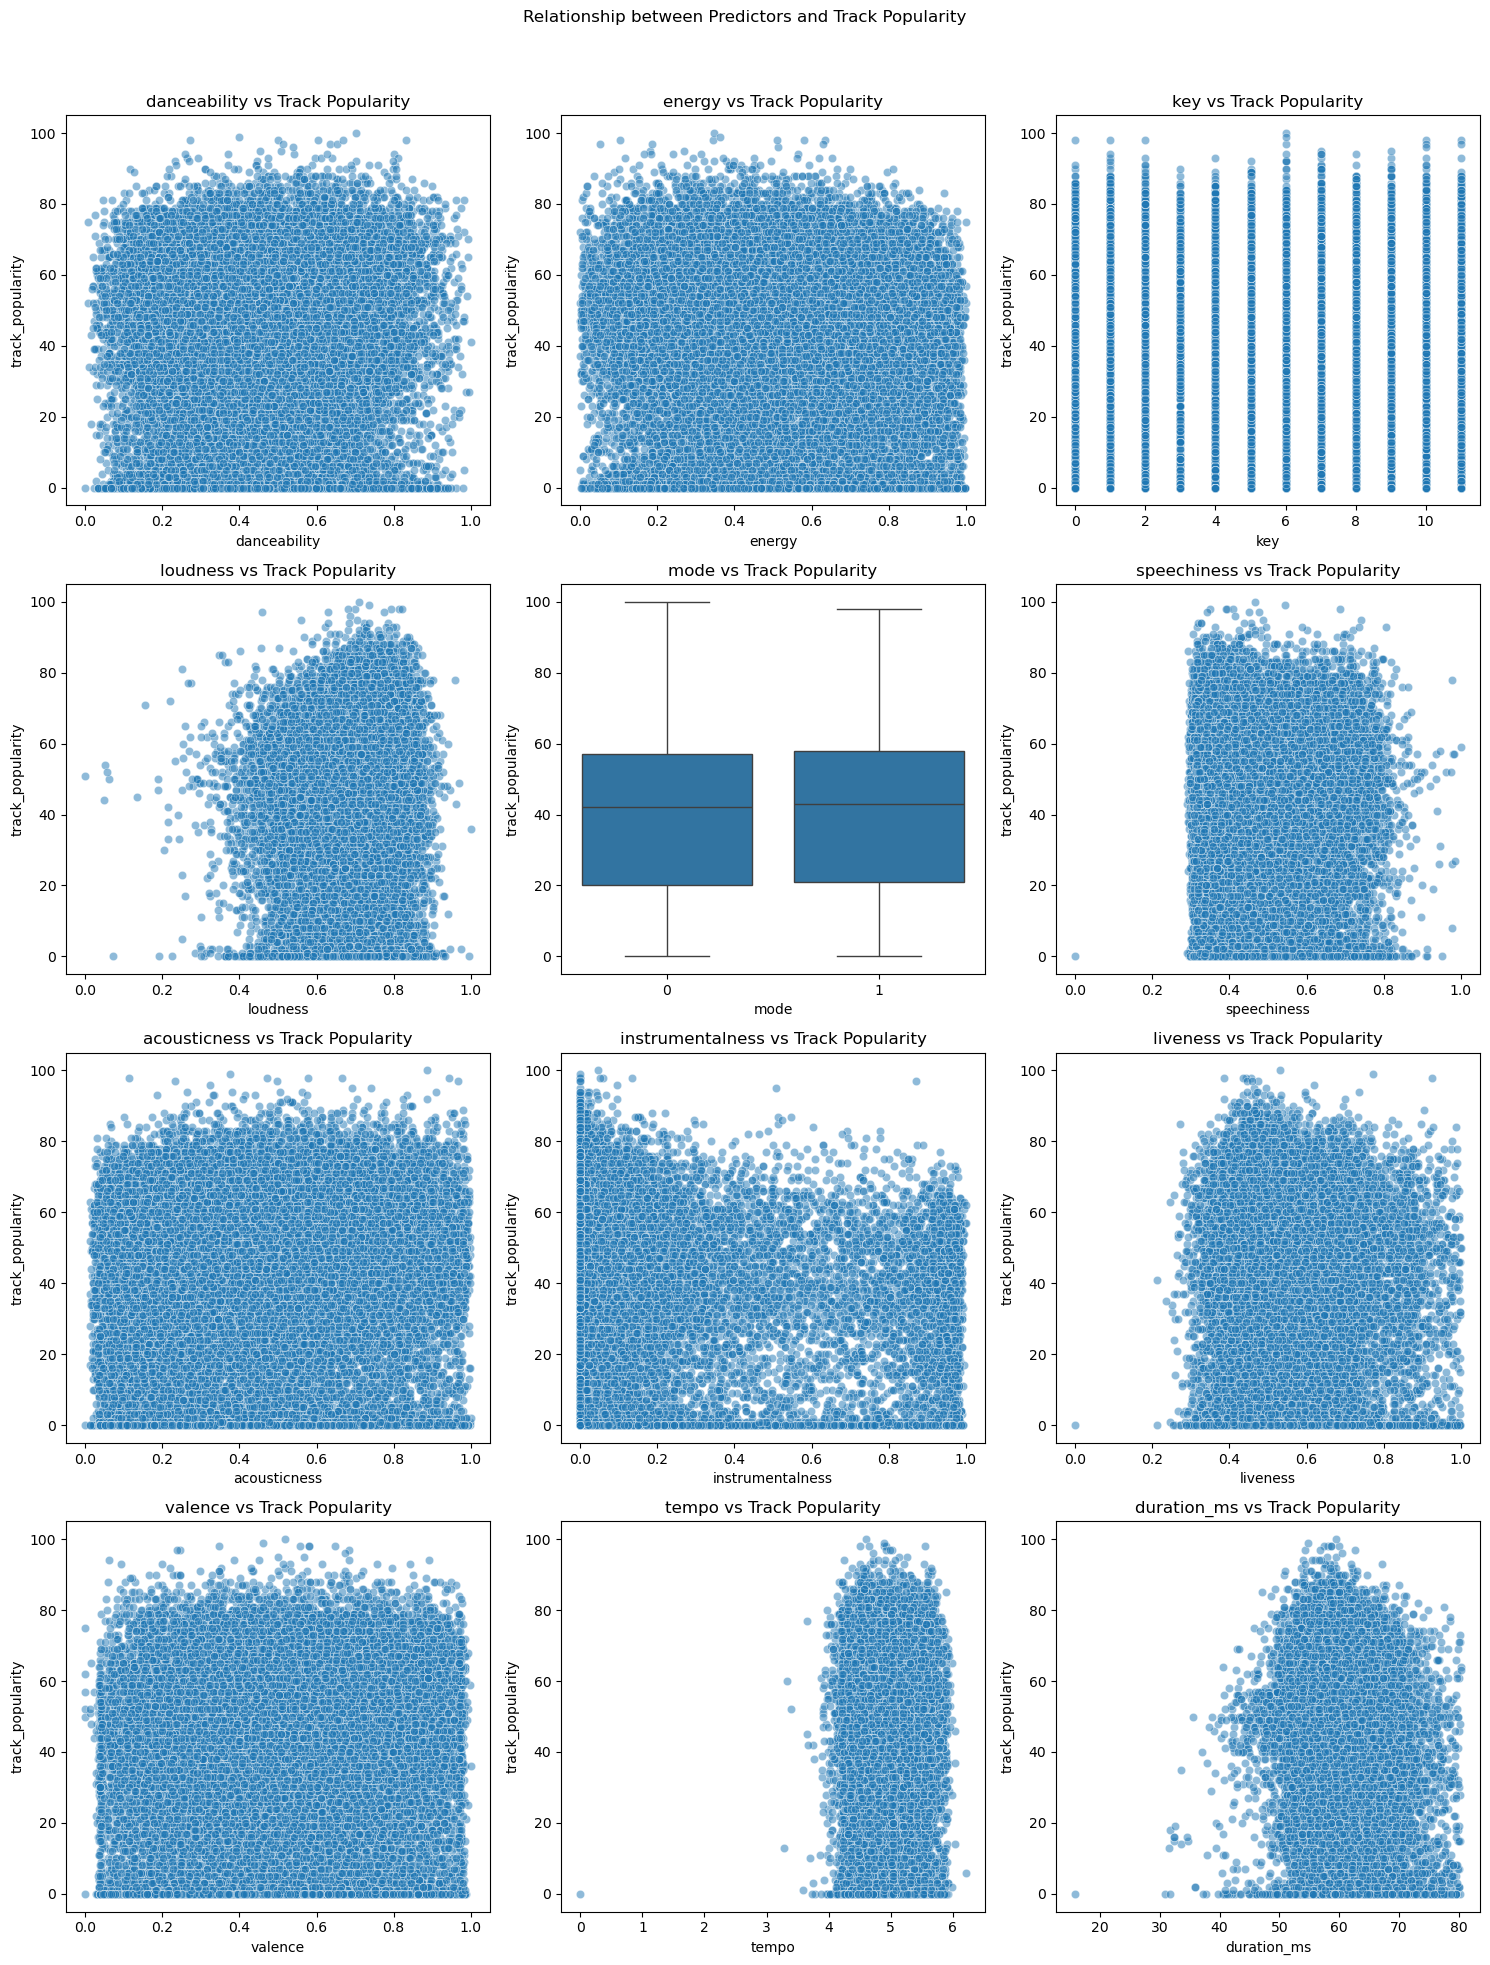

In [62]:
# # sns.pairplot(df, vars=numeric_columns, hue="track_popularity", palette="coolwarm")
# plt.suptitle("Pair Plot of Quantitative Features and Track Popularity", y=1.02)
# plt.show()

# Skip this as it takes 4 minutes to run

**Clustering**

Let's start to find the best number of cluster for our data by applying the Silhouettte Score, which measures how similar each point is to its own cluster compared to other clusters.

/Users/eliotatlani/opt/anaconda3/envs/hit_predict/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/eliotatlani/opt/anaconda3/envs/hit_predict/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/eliotatlani/opt/anaconda3/envs/hit_predict/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/eliotatlani/opt/anaconda3/envs/hit_predict/lib/python3.9/site-p

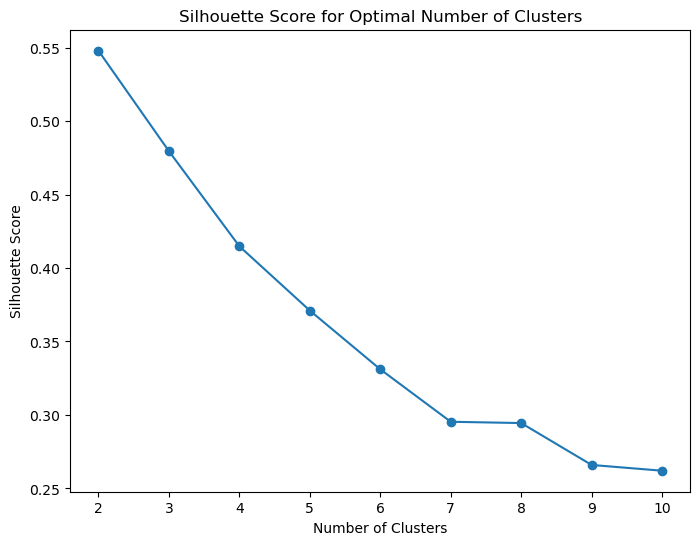

In [63]:
# Selecting key features for clustering
features_for_clustering = df[numeric_columns].fillna(0)

# Test silhouette scores for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_for_clustering)
    silhouette_scores.append(silhouette_score(features_for_clustering, labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()


The best number of clusters is the one that maximize the silhouette score, so here **k = 2**

We do the same thing to find the best number of PCA components, using the Explained Variance Ratio method, where we check the cumulative explained variance to see how much information is retained with each additional component, let use as a treshold 95%.

We will choose the smallest number of components that capture at least 95% of the variance

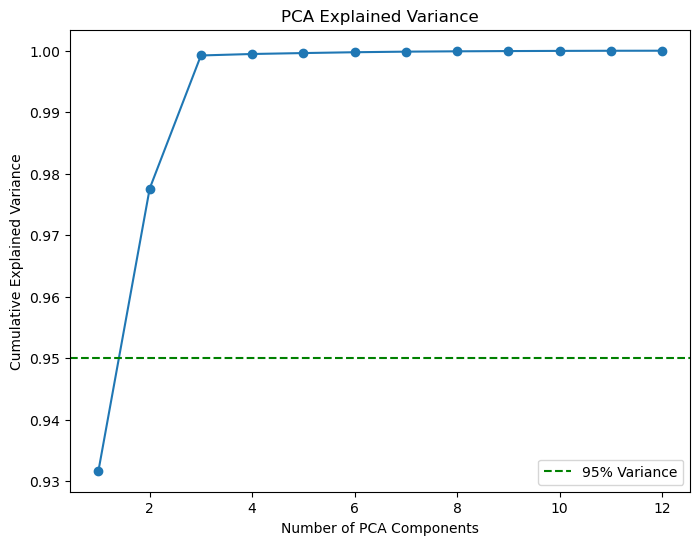

In [64]:
pca = PCA()
pca.fit(features_for_clustering)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

/Users/eliotatlani/opt/anaconda3/envs/hit_predict/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


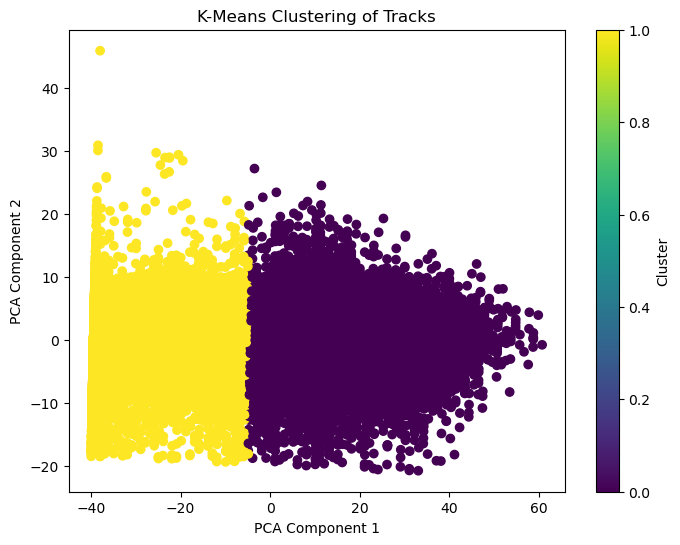

In [65]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(features_for_clustering)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
components = pca.fit_transform(features_for_clustering)
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap="viridis")
plt.title("K-Means Clustering of Tracks")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

/Users/eliotatlani/opt/anaconda3/envs/hit_predict/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


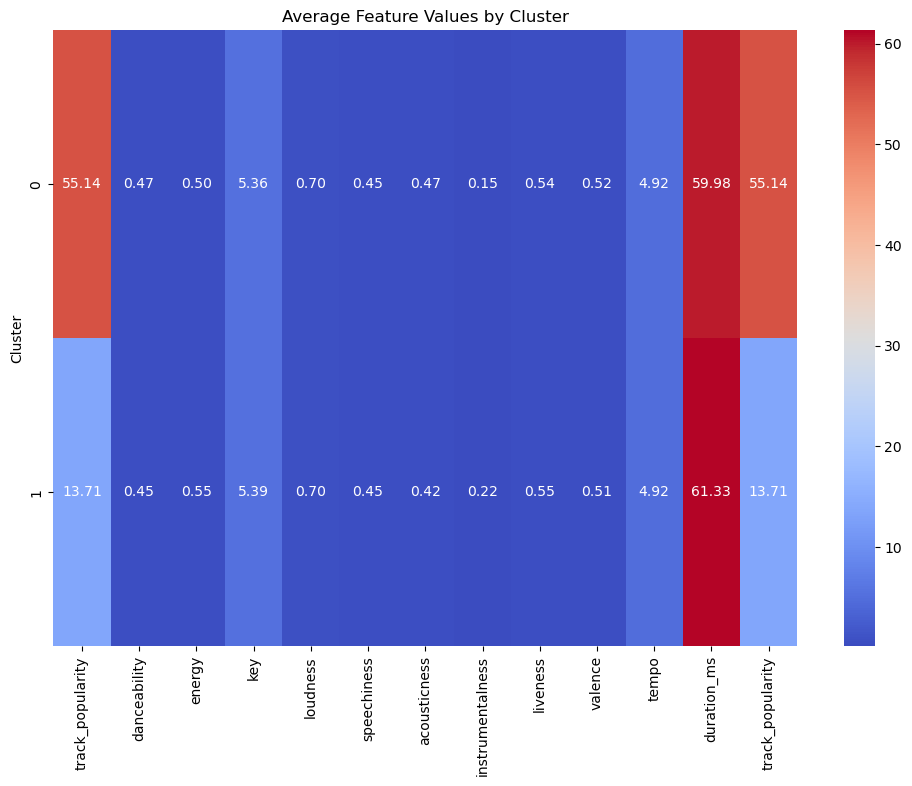

In [75]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_columns])

# Calculate mean values for each feature within each cluster
cluster_profile = df.groupby('Cluster')[numeric_columns + ['track_popularity']].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Average Feature Values by Cluster")
plt.show()

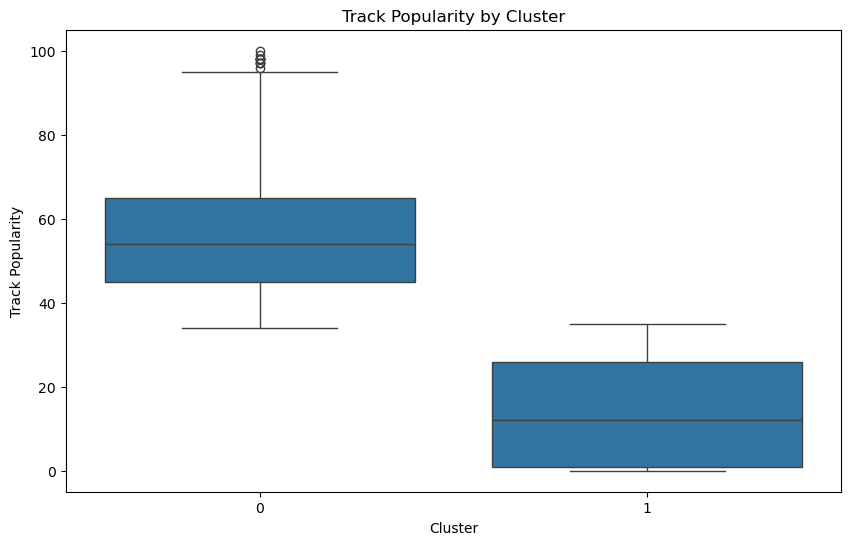

In [76]:
# Box plot to show distribution of track popularity within each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='track_popularity')
plt.title("Track Popularity by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Track Popularity")
plt.show()

#### Time-Based Trends

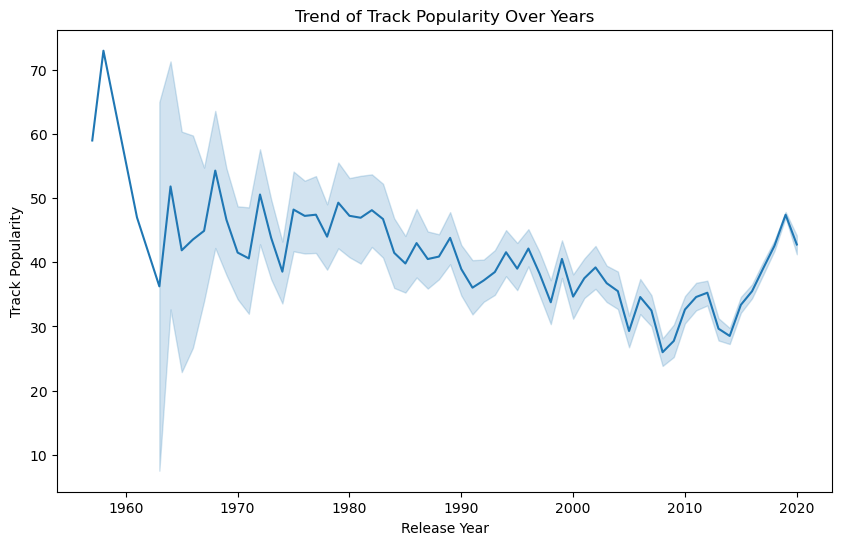

In [89]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="release_year", y="track_popularity", errorbar=('ci', 95))
plt.title("Trend of Track Popularity Over Years")
plt.xlabel("Release Year")
plt.ylabel("Track Popularity")
plt.show()


Let's find out if a specific day of month can augment our chance for our track to be popular (like christmas or summer song)

/var/folders/fk/y4nzg4p56g3_1th0bv19rx0r0000gn/T/ipykernel_82914/3405839339.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularity_by_month, x="release_month", y="track_popularity", palette="magma")


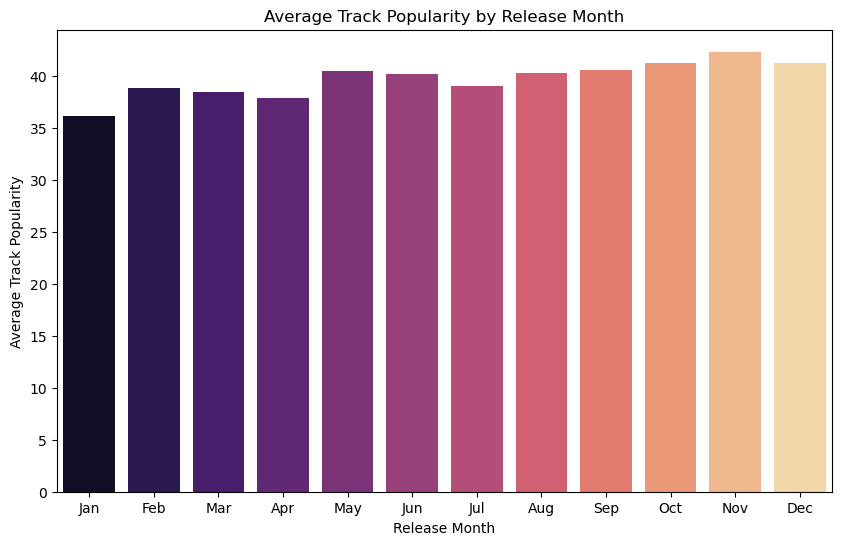

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average track popularity for each month
popularity_by_month = df.groupby('release_month')['track_popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=popularity_by_month, x="release_month", y="track_popularity", palette="magma")
plt.title("Average Track Popularity by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average Track Popularity")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


/var/folders/fk/y4nzg4p56g3_1th0bv19rx0r0000gn/T/ipykernel_82914/2034336463.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularity_by_day, x="release_day", y="track_popularity", palette="coolwarm")


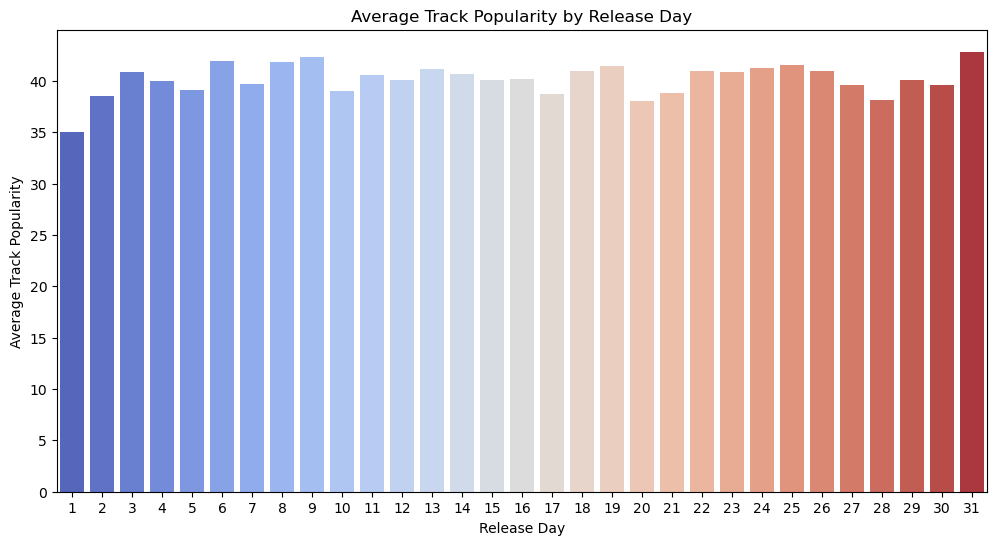

In [97]:
# Calculate the average track popularity for each day of the month
popularity_by_day = df.groupby('release_day')['track_popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=popularity_by_day, x="release_day", y="track_popularity", palette="coolwarm")
plt.title("Average Track Popularity by Release Day")
plt.xlabel("Release Day")
plt.ylabel("Average Track Popularity")
plt.xticks(ticks=range(0, 31), labels=range(1, 32))  # Days from 1 to 31
plt.show()


Unfortunately, there are no clear relation ship for month or day release

What about for artist name, playlist, track album name, genre etc.

### Correlation between features - Eliot

In [58]:
# heatmap ?

### Outlier Analysis

We are going to identify any outliers by looking at the number of outliers based on Z-scores, finding those that are more than 3 standard deviations away from the mean. We are going to do this analysis on numeric data since Z-scores can only be calculated for numeric data, and categorical variables do not support the concepts of outliers in the same way that numeric data does as they do not deviate from a distribution.

In [59]:
numeric_df = df.select_dtypes(include=[np.number])
outliers = numeric_df[(np.abs(zscore(numeric_df)) > 3).any(axis=1)]
print("Number of outliers:", len(outliers))

Number of outliers: 932


In [60]:
outlier_counts = (np.abs(zscore(numeric_df)) > 3).sum().astype(int)
print("Outliers per predictor:")
print(outlier_counts)

Outliers per predictor:
track_popularity            0
danceability                0
energy                      0
key                         0
loudness                  238
mode                        0
speechiness                94
acousticness                0
instrumentalness            0
liveness                  261
valence                     0
tempo                      18
duration_ms               368
rap                         0
rock                        0
edm                         0
r&b                         0
pop                         0
latin                       0
artist_track_encoded        1
playlist_id_encoded         0
track_album_id_encoded      0
release_year                0
release_month               0
release_day                 0
dtype: int64


We can see from the above that the predictors with outliers are `loudness`, `speechiness`, `liveness`, `tempo`, `duration_ms` and `artist_track_encoded`.

In [61]:
genres = ['rap', 'rock', 'edm', 'r&b', 'pop', 'latin']

outliers_by_genre = {genre: outliers[outliers[genre] == 1].shape[0] for genre in genres}
print(outliers_by_genre)

{'rap': 241, 'rock': 210, 'edm': 190, 'r&b': 142, 'pop': 72, 'latin': 101}


The outliers seem to be well-distributed across genres - there is not one genres with more outliers than the others.

We can plot the distributions of these predictors below to better understand the spread of the outliers, as well as a correlation matrix to see if any combination of these predictors are causing outliers.

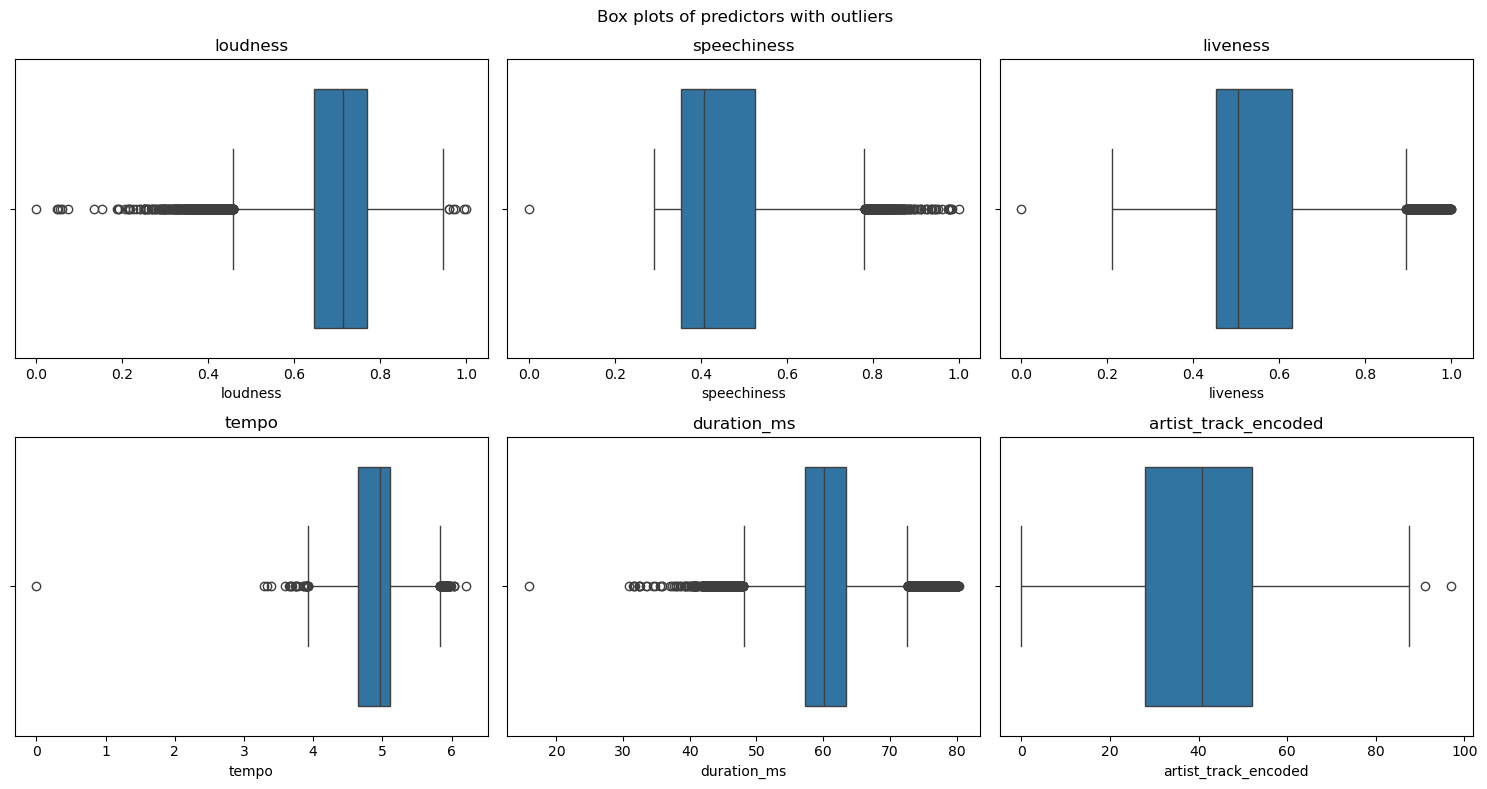

In [62]:
outlier_predictors = ["loudness", "speechiness", "liveness", "tempo", "duration_ms", "artist_track_encoded"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Box plots of predictors with outliers")

for i, predictor in enumerate(outlier_predictors):
    row, col = divmod(i, 3)
    sns.boxplot(x=df[predictor], ax=axes[row, col])
    axes[row, col].set_title(f"{predictor}")

plt.tight_layout()
plt.show()

From the box plots above, we can see that there is an outlier where `tempo`=0. We decide to remove this point since it is not really possible to have a song without a tempo. Upon taking a closer look at this point, we can see that this track is also the extreme outlier visible for `speechiness`, `liveness` and `duration_ms`.

In [65]:
df[df['tempo'] == 0].loc[:, outlier_predictors]

count         mean        std          min  \
track_popularity        28352.0    39.335320  23.699443     0.000000   
danceability            28352.0     0.463788   0.188308     0.000000   
energy                  28352.0     0.521398   0.238359     0.000000   
key                     28352.0     5.367417   3.613743     0.000000   
loudness                28352.0     0.699150   0.099062     0.000000   
mode                    28352.0     0.565533   0.495696     0.000000   
speechiness             28352.0     0.453648   0.127350     0.000000   
acousticness            28352.0     0.449806   0.248615     0.000000   
instrumentalness        28352.0     0.175032   0.289067     0.000000   
liveness                28352.0     0.544491   0.131413     0.000000   
valence                 28352.0     0.515021   0.236472     0.000000   
tempo                   28352.0     4.918515   0.365223     0.000000   
duration_ms             28352.0    60.497828   5.308430    15.874011   
rap                     28352.0     0.193390   0.394963     0.000000   
rock                    28352.0     0.156991   0.363798     0.000000   
edm                     28352.0     0.195295   0.396435     0.000000   
r&b                     28352.0     0.181222   0.385209     0.000000   
pop                     28352.0     0.181010   0.385033     0.000000   
latin                   28352.0     0.163622   0.369938     0.000000   
artist_track_encoded    28352.0    39.335320  17.499857     0.000000   
playlist_id_encoded     28352.0    39.335320  14.908984     3.548387   
track_album_id_encoded  28352.0    39.335320  23.415735     0.000000   
release_year            26671.0  2012.103146  10.246982  1957.000000   
release_month           26671.0     6.418057   3.735432     1.000000   
release_day             26671.0    14.198268   9.434473     1.000000   
Cluster                 28352.0     0.381455   0.485752     0.000000   

                                25%          50%          75%          max  
track_popularity          21.000000    42.000000    58.000000   100.000000  
danceability               0.325701     0.464561     0.597751     1.000000  
energy                     0.335241     0.521284     0.710649     1.000000  
key                        2.000000     6.000000     9.000000    11.000000  
loudness                   0.645094     0.714462     0.769362     1.000000  
mode                       0.000000     1.000000     1.000000     1.000000  
speechiness                0.354797     0.408549     0.525214     1.000000  
acousticness               0.243211     0.431212     0.639532     1.000000  
instrumentalness           0.000000     0.027490     0.187693     1.000000  
liveness                   0.453020     0.503325     0.629961     1.000000  
valence                    0.331988     0.516650     0.701312     1.000000  
tempo                      4.641156     4.959588     5.117217     6.209628  
duration_ms               57.260249    60.086265    63.411205    80.301467  
rap                        0.000000     0.000000     0.000000     1.000000  
rock                       0.000000     0.000000     0.000000     1.000000  
edm                        0.000000     0.000000     0.000000     1.000000  
r&b                        0.000000     0.000000     0.000000     1.000000  
pop                        0.000000     0.000000     0.000000     1.000000  
latin                      0.000000     0.000000     0.000000     1.000000  
artist_track_encoded      28.000000    40.666667    52.000000    97.000000  
playlist_id_encoded       28.983051    38.696970    50.740260    79.195652  
track_album_id_encoded    21.888889    43.000000    58.000000   100.000000  
release_year            2010.000000  2016.000000  2019.000000  2020.000000  
release_month              3.000000     7.000000    10.000000    12.000000  
release_day                6.000000    14.000000    22.000000    31.000000  
Cluster                    0.000000     0.000000     1.000000     1.000000

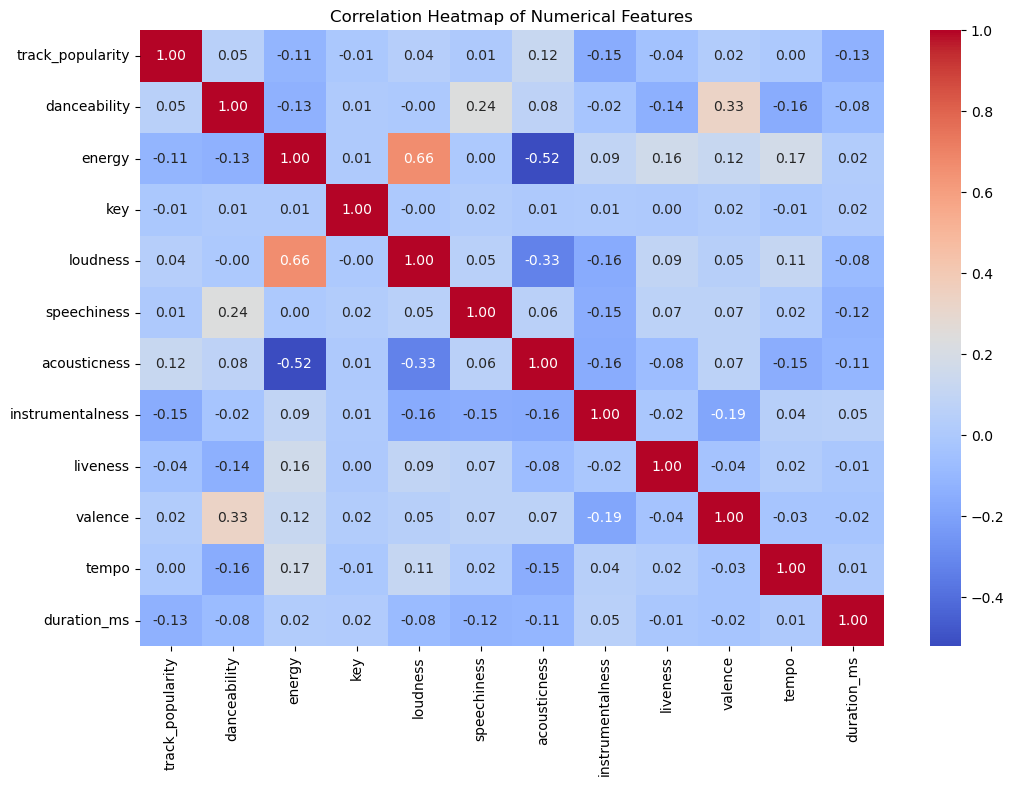

In [87]:
# removing this datapoint
df = df[df['tempo'] != 0]
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The extreme outlier has now been removed, which we can see in the boxplots below:

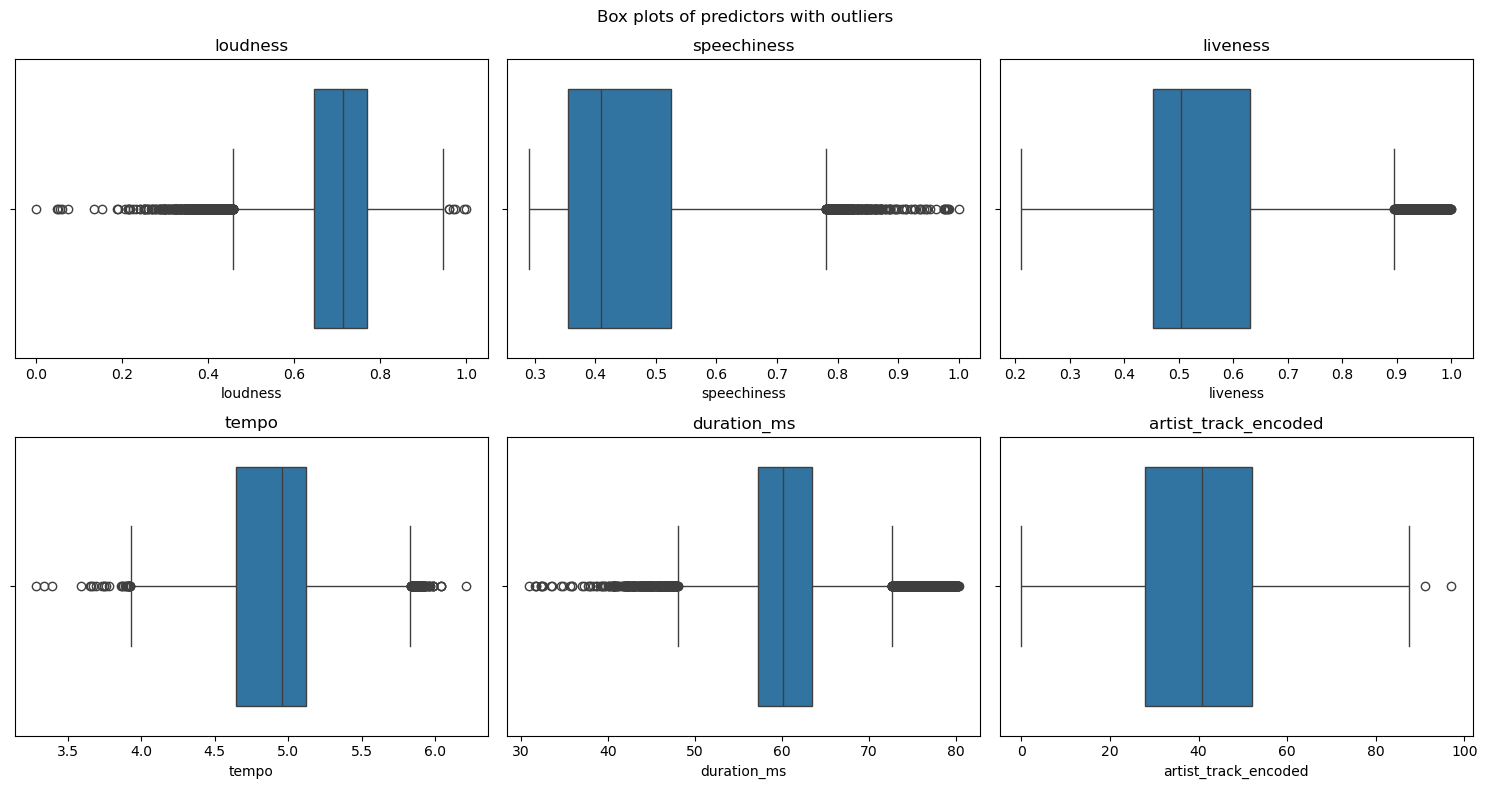

In [67]:
outlier_predictors = ["loudness", "speechiness", "liveness", "tempo", "duration_ms", "artist_track_encoded"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Box plots of predictors with outliers")

for i, predictor in enumerate(outlier_predictors):
    row, col = divmod(i, 3)
    sns.boxplot(x=df[predictor], ax=axes[row, col])
    axes[row, col].set_title(f"{predictor}")

plt.tight_layout()
plt.show()

We decide not to remove the outlier for `artist_track_encoded` since it is not too far from the rest of the distribution.

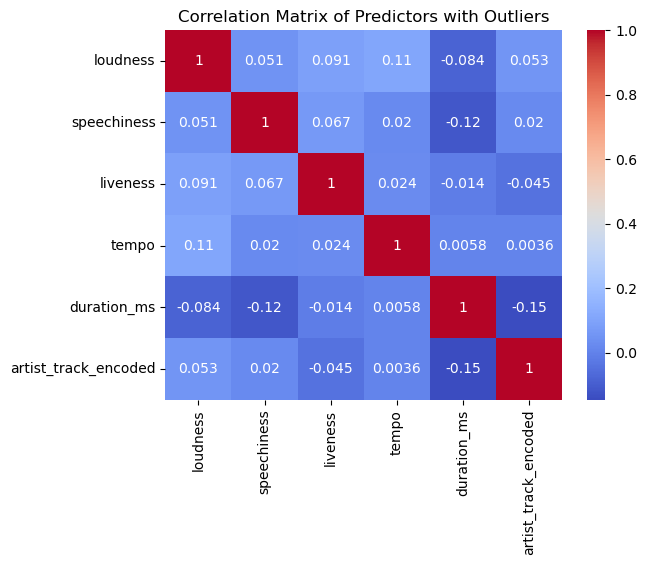

In [43]:
corr_matrix = df[outlier_predictors].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Predictors with Outliers")
plt.show()

There are not any notable combinations of predictors with outliers to take note of here.

From our knowledge about music more generally, it is not surprising that there are some outliers and variation in the music itself as some artists tend to experiment occasionally with unusual styles or characteristics. Specifically for `duration_ms`, it is not uncommon to see songs that are especially long or short. 

Since music inherently has a lot of variation, it may therefore be best in this case to keep the majority of these outliers. These outliers may represent distinct styles of music, and for our case of predictions, keeping outliers might make the model more adaptable to different music styles. 

Other than the point removed above, we decide to keep all other outliers.

### Leverage and influential point analysis

We can fit a simple preliminary regression model to identify any leverage and influential points in the data utilising the numeric values that characterise the tracks. We therefore choose to exclude `release_year`, `release_month` and `release_day` for the time being.

In [77]:
numeric_predictors = df.select_dtypes(include=[np.number]).columns.drop(['track_popularity', 'release_year', 'release_month', 'release_day'])

X = df[numeric_predictors]
y = df['track_popularity']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)

In [85]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

influence = model_sm.get_influence()

# calculate leverage and Cook's Distance
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# define thresholds and find influential points
leverage_threshold = 2 * (len(predictors) + 1) / len(df)
cooks_threshold = 4 / len(df)

# create a df to store leverage and Cook's Distance for each observation
influential_df = pd.DataFrame({
    'Leverage': leverage,
    'Cook\'s Distance': cooks_d
}, index=df.index)

influential_df['High Leverage'] = influential_df['Leverage'] > leverage_threshold
influential_df['High Cook\'s Distance'] = influential_df['Cook\'s Distance'] > cooks_threshold
influential_points = influential_df[(influential_df['High Leverage']) | 
                                    (influential_df['High Cook\'s Distance'])]

num_high_leverage = influential_df['High Leverage'].sum()
num_high_cooks_distance = influential_df['High Cook\'s Distance'].sum()
num_both = ((influential_df['High Leverage']) & (influential_df['High Cook\'s Distance'])).sum()

print(f"Number of high leverage points: {num_high_leverage}")
print(f"Number of high Cook's Distance points: {num_high_cooks_distance}")
print(f"Number of points with both high leverage and high Cook's Distance: {num_both}")

Number of high leverage points: 6094
Number of high Cook's Distance points: 1780
Number of points with both high leverage and high Cook's Distance: 483


Given the high number of high leverage and influential points that we found above, combined with the inherent variation in music data, it makes sense in this case to keep these points. Capturing all variations gives us a more complete picture of music trends even for more uncommon tracks which could help with prediction down the line. Given the large number of them, it seems that they capture the diversity of music data as opposed to errors or mistakes. 

Therefore, we keep these points, but can always refer back to this analysis down the line if we do want to look further into the impact of these points on the model we create.

## Baseline Models - Eliot from modeling.ipynb
<a id="baseline-model"></a>

Baseline Model or Implementation Plan: Finally, you should include a baseline model presented in lecture or a clear plan for its implementation. This can include details on the model architecture, the data used for training and validation, and the evaluation metrics used to assess model performance. 

### Predicting the maximum class the target variable - always predicting popularity 0

In [82]:
# Like in HW4

### Linear Regression

### K-NN Classifier

In [83]:
# See HW2 for good steps on how to proceed

### Previous models?

In [24]:
# From Kaggle

### Comparison according to how the target variable's 0 values were handled to discuss

## Implementation Plan

1. Experiment with different feature engineering techniques, such as polynomial features or interactions.
2. Test additional models, including decision trees, random forests, and neural networks.
3. Tune hyperparameters for optimal model performance.
4. Evaluate models, iteratively improving results.
5. Discussion about the initial choice on how the 0 values in the target variable were handled. In the scenario where we just removed them, predicting the popularity of such songs using our final model and discussing the results.